# Q1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import numpy as np

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
m1 = pd.read_csv('Measurement_Q1.csv', names = ["time", "measurement"], header = 0)

In [3]:
m1_model = ARIMA(m1.measurement, order=(0,1,1))
m1_model_fit = m1_model.fit()
m1_model_fit.summary()

E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.measurement   No. Observations:                  149
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -202.607
Method:                       css-mle   S.D. of innovations              0.940
Date:                Fri, 14 Oct 2022   AIC                            411.215
Time:                        08:35:15   BIC                            420.227
Sample:                             1   HQIC                           414.876
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0064      0.135     -0.048      0.962      -0.270       0.257
ma.L1.D.measurement     0.7531      0.069     10.930      0.000       0.618       0.888
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3278           +0.0000j            1.3278            0.5000
-----------------------------------------------------------------------------
"""

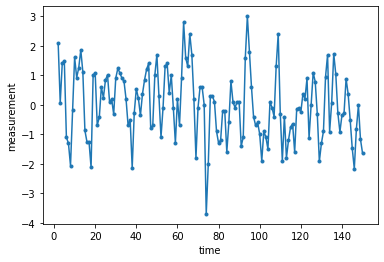

In [4]:
m1_diff=m1.measurement.diff()
plt.plot(m1['time'],m1_diff, '.-')
plt.xlabel('time')
plt.ylabel('measurement')
plt.show()

In [5]:
m1_diff = m1_diff.iloc[1:]
m1_model2 = ARIMA(m1_diff, order=(0,0,1))
m1_model_fit2 = m1_model2.fit()
m1_model_fit2.summary()

E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            measurement   No. Observations:                  149
Model:                     ARMA(0, 1)   Log Likelihood                -202.607
Method:                       css-mle   S.D. of innovations              0.940
Date:                Fri, 14 Oct 2022   AIC                            411.215
Time:                        08:35:15   BIC                            420.227
Sample:                             0   HQIC                           414.876
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0064      0.135     -0.048      0.962      -0.270       0.257
ma.L1.measurement     0.7531      0.069     10.930      0.000       0.618       0.888
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3278           +0.0000j            1.3278            0.5000
-----------------------------------------------------------------------------
"""

The two models show similar status on **log likelihood**, **SD of innovations**, **AIC**, **BIC**, and **HQIC**. Models also show similar value in terms of regressions. The result is unsurprising since IMA(1,1) follows similar steps as using differencing data to create MA(1), as I=1 tranfers data to its first difference.


# Q2

In [6]:
GAT = pd.read_csv('GlobalAirTemperature.csv', names = ["time", "measurement"], header = 0)

In [7]:
GAT

,time,measurement
0,1880,-0.11
1,1881,-0.13
2,1882,-0.01
3,1883,-0.04
4,1884,-0.42
...,...,...
120,2000,0.41
121,2001,0.56
122,2002,0.70
123,2003,0.66


In [8]:
GAT11_model = ARIMA(GAT.measurement, order=(0,1,1))
GAT11_model_fit = GAT11_model.fit()
GAT11_model_fit.summary()

E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.measurement   No. Observations:                  124
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  74.163
Method:                       css-mle   S.D. of innovations              0.133
Date:                Fri, 14 Oct 2022   AIC                           -142.326
Time:                        08:35:15   BIC                           -133.865
Sample:                             1   HQIC                          -138.889
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0061      0.004      1.715      0.086      -0.001       0.013
ma.L1.D.measurement    -0.7079      0.073     -9.680      0.000      -0.851      -0.565
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4125           +0.0000j            1.4125            0.0000
-----------------------------------------------------------------------------
"""

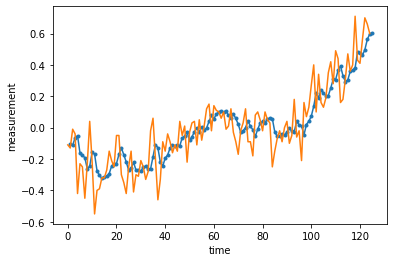

In [9]:
GAT11_predict = GAT11_model_fit.predict (1, len(GAT.measurement), typ = 'levels').rename("Predictions")
plt.plot(GAT11_predict, '.-')
plt.plot(GAT['measurement'])
plt.xlabel('time')
plt.ylabel('measurement')
plt.show()

In [10]:
sse11 = np.sum((GAT11_predict - GAT.measurement)**2)
sse11

2.189516875702044

In [11]:
GAT12_model = ARIMA(GAT.measurement, order=(0,1,2))
GAT12_model_fit = GAT12_model.fit()
GAT12_model_fit.summary()

E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.measurement   No. Observations:                  124
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  78.189
Method:                       css-mle   S.D. of innovations              0.128
Date:                Fri, 14 Oct 2022   AIC                           -148.379
Time:                        08:35:15   BIC                           -137.098
Sample:                             1   HQIC                          -143.796
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0061      0.003      2.038      0.042       0.000       0.012
ma.L1.D.measurement    -0.4993      0.084     -5.924      0.000      -0.664      -0.334
ma.L2.D.measurement    -0.2486      0.080     -3.124      0.002      -0.404      -0.093
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2388           +0.0000j            1.2388            0.0000
MA.2           -3.2475           +0.0000j            3.2475            0.5000
-----------------------------------------------------------------------------
"""

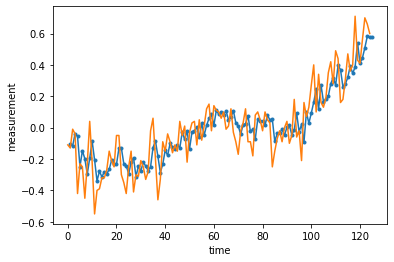

In [12]:
GAT12_predict = GAT12_model_fit.predict (1, len(GAT.measurement), typ = 'levels').rename("Predictions")
plt.plot(GAT12_predict, '.-')
plt.plot(GAT.measurement)
plt.xlabel('time')
plt.ylabel('measurement')
plt.show()

In [13]:
sse12 = np.sum((GAT12_predict - GAT.measurement)**2)
sse12

2.0570006559057963

By comparing the SSE we can see that **IMA(1,2)** has a small SSE, and is better for the data.

# Q3

In [14]:
m3 = pd.read_csv('Measurement_Q3.csv', names = ["time", "measurement"], header = 0)

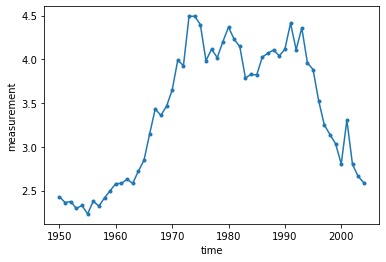

In [15]:
plt.plot(m3['time'], m3['measurement'], '.-')
plt.xlabel('time')
plt.ylabel('measurement')
plt.show()

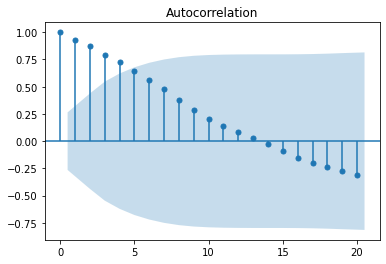

In [16]:
plot_acf(m3["measurement"], lags = 20)
plt.show()

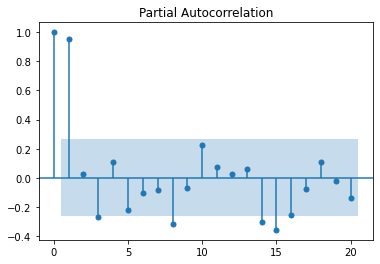

In [17]:
plot_pacf(m3["measurement"], lags = 20)
plt.show()

In [18]:
m3_diff = m3.measurement.diff()
m3_diff = m3_diff.iloc[1:]

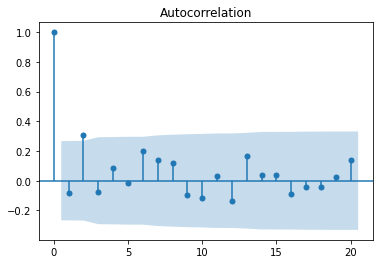

In [19]:
plot_acf(m3_diff, lags = 20)
plt.show()

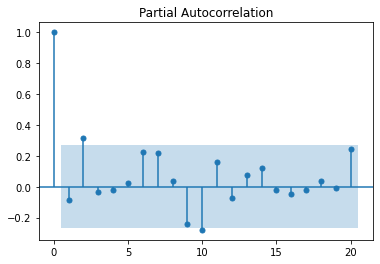

In [20]:
plot_pacf(m3_diff, lags = 20)
plt.show()

We should apply **AR(2)** and **MA(2)** since both data of ACF and PACF show significant cutoff after lag(2). Therefore we should apply **ARMA(2,1,2)** as our model if we use first difference.